In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [46]:
img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)


array([[[250, 248, 249],
        [250, 248, 249],
        [250, 248, 249],
        ...,
        [250, 248, 249],
        [250, 248, 249],
        [250, 248, 249]],

       [[250, 248, 249],
        [250, 248, 249],
        [250, 248, 249],
        ...,
        [250, 248, 249],
        [250, 248, 249],
        [250, 248, 249]],

       [[250, 248, 249],
        [250, 248, 249],
        [250, 248, 249],
        ...,
        [250, 248, 249],
        [250, 248, 249],
        [250, 248, 249]],

       ...,

       [[ 49,  41,  38],
        [ 51,  39,  39],
        [ 53,  37,  38],
        ...,
        [ 75,  80,  86],
        [ 72,  77,  83],
        [ 70,  75,  79]],

       [[ 50,  42,  39],
        [ 52,  40,  40],
        [ 53,  37,  38],
        ...,
        [ 75,  82,  88],
        [ 73,  78,  84],
        [ 70,  75,  79]],

       [[ 51,  43,  40],
        [ 51,  39,  39],
        [ 54,  38,  39],
        ...,
        [ 76,  83,  89],
        [ 71,  78,  84],
        [ 67,  75,  78]]

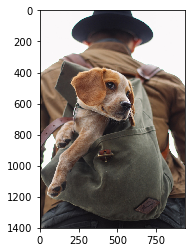

In [47]:
plt.imshow(img1)
img1

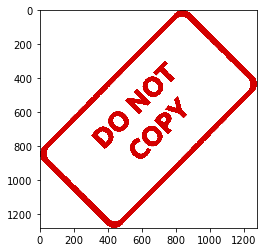

In [48]:
plt.imshow(img2)

In [49]:
# BLENDING IMAGES OF SAME SIZE
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

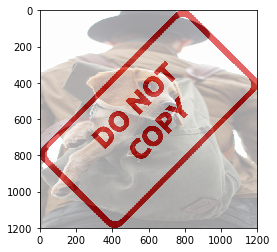

In [50]:
# Both ways work
#blended = cv2.addWeighted(src1=img1,alpha=0.5,src2=img2,beta=0.5,gamma=0)
blended = cv2.addWeighted(img1,0.4,img2,0.6,1)

plt.imshow(blended)

In [51]:
#Overlay small image on top of a larger image (no blending)
# Numpy reassignment


In [52]:
img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)


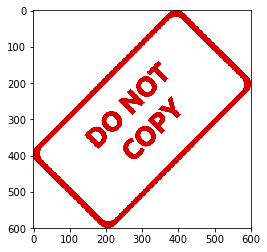

In [53]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

In [54]:
large_img = img1
small_img = img2

In [55]:
x_offset=0
y_offset=0

In [56]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

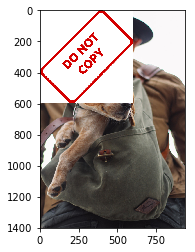

In [57]:
plt.imshow(large_img)

In [58]:
img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [59]:
img2 = cv2.resize(img2,(600,600))

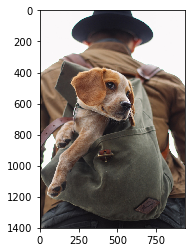

In [60]:
plt.imshow(img1)

In [61]:
img1.shape

(1401, 934, 3)

In [62]:
xOffset = 934-600
yOffset = 1401-600

In [63]:
rows,cols,channels = img2.shape

In [64]:
roi = img1[yOffset:1401,xOffset:943]

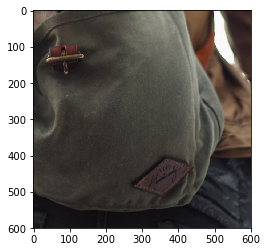

In [65]:
plt.imshow(roi)

In [66]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

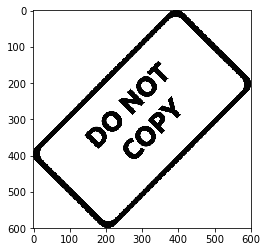

In [67]:
plt.imshow(img2gray,cmap='gray')

In [68]:
maskInv = cv2.bitwise_not(img2gray)

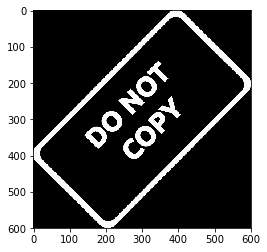

In [69]:
plt.imshow(maskInv,cmap='gray')

In [70]:
maskInv.shape

(600, 600)

In [71]:
whiteBackground = np.full(img2.shape,255,dtype=np.uint8)
whiteBackground

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [72]:
bk = cv2.bitwise_or(whiteBackground,whiteBackground,mask=maskInv)

In [73]:
bk.shape

(600, 600, 3)

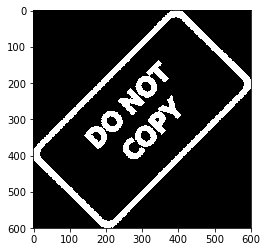

In [74]:
plt.imshow(bk)

In [75]:
fg = cv2.bitwise_or(img2,img2,mask = maskInv)

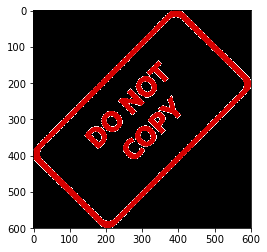

In [76]:
plt.imshow(fg)

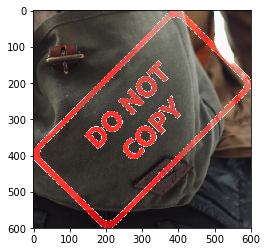

In [77]:
finalRoi = cv2.bitwise_or(roi,fg)
plt.imshow(finalRoi)

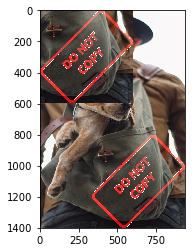

In [85]:
large_img = img1
small_img = finalRoi


large_img[yOffset:yOffset+small_img.shape[0], xOffset:xOffset+small_img.shape[1]] = small_img

plt.imshow(large_img)